In [17]:
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data = pd.read_csv(f'../data/data.csv')
data.head()

,brand,model,price_in_pln,mileage,gearbox,engine_capacity,fuel_type,city,voivodeship,year
0,alfa-romeo,Alfa Romeo Spider 2.0-16 TSpark,14700.0,133 760 km,manual,1 970 cm3,Benzyna,Łask,Łódzkie,1998
1,alfa-romeo,Alfa Romeo GTV 2.0 16v TSpark,14000.0,133 760 km,manual,1 970 cm3,Benzyna,Mława,Mazowieckie,1998
2,alfa-romeo,Alfa Romeo 164 2.0 TSpark Super,4500.0,227 000 km,manual,1 970 cm3,Benzyna,Chełmża,Kujawsko-pomorskie,1996
3,alfa-romeo,Alfa Romeo Spider 2.0 TSpark,17100.0,227 000 km,manual,1 970 cm3,Benzyna,Jasło,Podkarpackie,1996
4,alfa-romeo,Alfa Romeo 156 1.6 TSpark 16v,3900.0,239 000 km,manual,1 995 cm3,Benzyna+LPG,Pabianice,Łódzkie,1995


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91523 entries, 0 to 91522
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            91523 non-null  object 
 1   model            91523 non-null  object 
 2   price_in_pln     91523 non-null  float64
 3   mileage          91523 non-null  object 
 4   gearbox          91523 non-null  object 
 5   engine_capacity  91523 non-null  object 
 6   fuel_type        91523 non-null  object 
 7   city             91523 non-null  object 
 8   voivodeship      91523 non-null  object 
 9   year             91523 non-null  object 
dtypes: float64(1), object(9)
memory usage: 7.0+ MB


In [20]:
# Droping rows with mismatched data and converting mileage to numeric

data = data[data['mileage'].str.contains("km", na=False)]
data['mileage'] = data['mileage'].str.replace("km", "").str.replace(" ", "").astype(float)


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86109 entries, 0 to 91522
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            86109 non-null  object 
 1   model            86109 non-null  object 
 2   price_in_pln     86109 non-null  float64
 3   mileage          86109 non-null  float64
 4   gearbox          86109 non-null  object 
 5   engine_capacity  86109 non-null  object 
 6   fuel_type        86109 non-null  object 
 7   city             86109 non-null  object 
 8   voivodeship      86109 non-null  object 
 9   year             86109 non-null  object 
dtypes: float64(2), object(8)
memory usage: 7.2+ MB


In [22]:
# Droping rows with mismatched data and converting engine_capacity to numeric
data = data[data['engine_capacity'].str.contains("cm3", na=False)]
data['engine_capacity'] = data['engine_capacity'].str.replace("cm3", "").str.replace(" ", "").astype(float)

In [23]:
data['year'] = pd.to_numeric(data['year'])

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85677 entries, 0 to 91522
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            85677 non-null  object 
 1   model            85677 non-null  object 
 2   price_in_pln     85677 non-null  float64
 3   mileage          85677 non-null  float64
 4   gearbox          85677 non-null  object 
 5   engine_capacity  85677 non-null  float64
 6   fuel_type        85677 non-null  object 
 7   city             85677 non-null  object 
 8   voivodeship      85677 non-null  object 
 9   year             85677 non-null  int64  
dtypes: float64(3), int64(1), object(6)
memory usage: 7.2+ MB


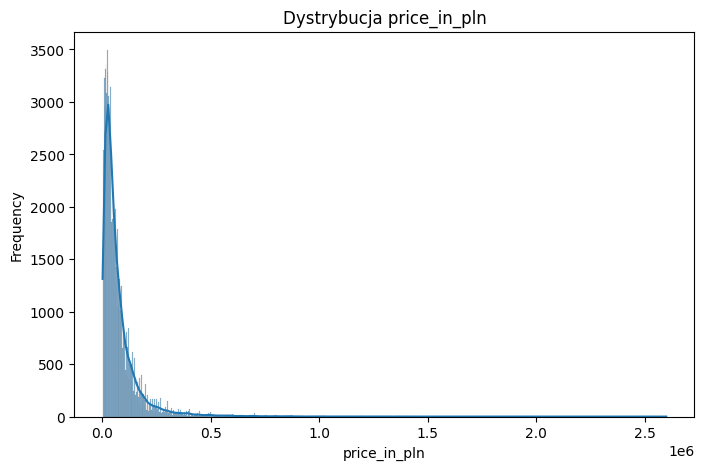

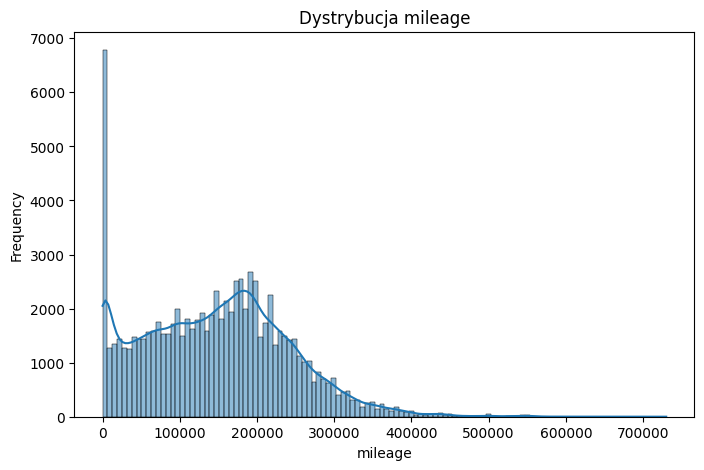

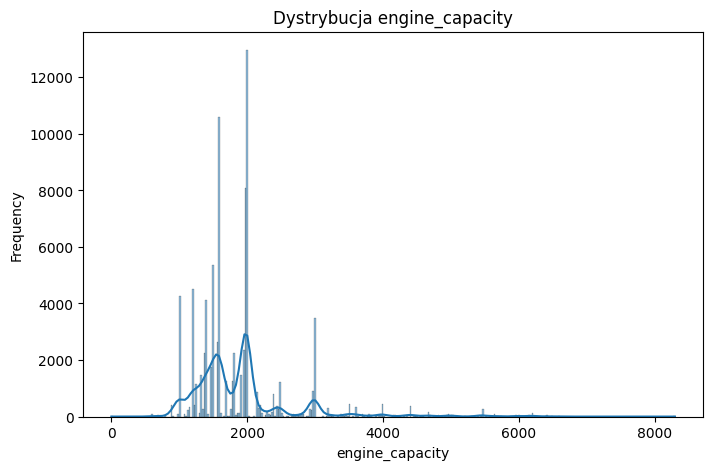

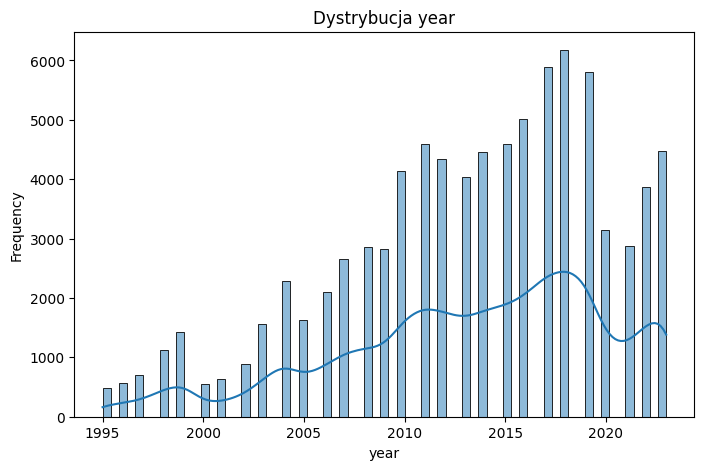

In [25]:
numeric_cols = data.select_dtypes(include=['float64', 'int64'])

for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], kde=True)
    plt.title(f'Dystrybucja {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [26]:
data['voivodeship'].unique()
valid_voivoeship = ['Łódzkie', 'Mazowieckie', 'Kujawsko-pomorskie', 'Podkarpackie',
       'Wielkopolskie', 'Pomorskie', 'Małopolskie', 'Podlaskie',
       'Śląskie', 'Dolnośląskie', 'Lubelskie', 'Świętokrzyskie',
       'Zachodniopomorskie', 'Lubuskie', 'Opolskie',
       'Warmińsko-mazurskie']
data = data[data['voivodeship'].isin(valid_voivoeship)]

In [27]:
data['voivodeship'].unique()

array(['Łódzkie', 'Mazowieckie', 'Kujawsko-pomorskie', 'Podkarpackie',
       'Wielkopolskie', 'Pomorskie', 'Małopolskie', 'Podlaskie',
       'Śląskie', 'Dolnośląskie', 'Lubelskie', 'Świętokrzyskie',
       'Zachodniopomorskie', 'Lubuskie', 'Opolskie',
       'Warmińsko-mazurskie'], dtype=object)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85632 entries, 0 to 91522
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            85632 non-null  object 
 1   model            85632 non-null  object 
 2   price_in_pln     85632 non-null  float64
 3   mileage          85632 non-null  float64
 4   gearbox          85632 non-null  object 
 5   engine_capacity  85632 non-null  float64
 6   fuel_type        85632 non-null  object 
 7   city             85632 non-null  object 
 8   voivodeship      85632 non-null  object 
 9   year             85632 non-null  int64  
dtypes: float64(3), int64(1), object(6)
memory usage: 7.2+ MB


In [29]:
profile = ProfileReport(data, title="Used Cars")
profile.to_notebook_iframe()
profile.to_file("automatic_report.html")

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.10s/it]


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 141.24it/s]


In [31]:
data.to_csv('../data/data.csv')